In [33]:
import datetime as dt
import pandas as pd
# import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
from keras.losses import mean_absolute_error

from sklearn import preprocessing, svm
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import tensorflow as tf

## Deep-learing:
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
import itertools
from keras.layers import LSTM
from keras.layers import Dropout

In [34]:
df = pd.read_csv('MERRA Data.csv')
df = df.iloc[:, :8]
df.head(5)

c:\users\xgent\pycharmprojects\datascience_project\venv\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (28,29,30,31,32,33,34,35,36,37,38,39,40) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,DateTime,Year,Time,Speed,Direction,Temperature10,Temperature2,Pressure
0,1980-01-01T00:00:00,1980,00:00:00,7.43,36.2,25.1,24.8,101.1
1,1980-01-01T01:00:00,1980,01:00:00,6.96,42.0,25.4,25.3,101.1
2,1980-01-01T02:00:00,1980,02:00:00,6.33,47.6,26.0,26.0,101.2
3,1980-01-01T03:00:00,1980,03:00:00,5.79,50.1,26.3,26.4,101.3
4,1980-01-01T04:00:00,1980,04:00:00,5.36,46.9,26.6,26.8,101.3


In [35]:
df['DateTime'] = pd.to_datetime(df['DateTime'] )
df.reset_index()
df = df.set_index(df['DateTime'])
df.index = pd.to_datetime(df.index)
df = df.resample('D').mean()
# df = df[:, :-7]
df['Month'] = df.index.month
df['Date'] = df.index.day
df = df[['Speed', 'Direction', 'Temperature10', 'Temperature2', 'Pressure', 'Year', 'Month', 'Date']]
df.head(5)

,Speed,Direction,Temperature10,Temperature2,Pressure,Year,Month,Date
DateTime,,,,,,,,
1980-01-01,5.913750,39.929167,25.700000,25.554167,101.083333,1980,1,1
1980-01-02,5.263750,44.762500,25.320833,25.191667,101.104167,1980,1,2
1980-01-03,5.071667,47.408333,25.425000,25.262500,101.125000,1980,1,3
1980-01-04,6.575000,48.387500,25.766667,25.716667,101.100000,1980,1,4
1980-01-05,8.146250,45.204167,25.970833,25.945833,101.108333,1980,1,5


In [36]:
df_train = df['1980-01-01':'2015-12-31']
df_validation = df['2015-01-01':'2016-12-31']
df_test  = df['2017-01-01':]
df_train.shape
# df_train.tail(5)

(13149, 8)

In [37]:
df_test.head(5)

,Speed,Direction,Temperature10,Temperature2,Pressure,Year,Month,Date
DateTime,,,,,,,,
2017-01-01,8.082500,31.570833,26.275000,26.320833,101.141667,2017,1,1
2017-01-02,8.998750,26.404167,26.166667,26.266667,101.183333,2017,1,2
2017-01-03,8.342083,30.029167,26.204167,26.233333,101.162500,2017,1,3
2017-01-04,7.523333,35.095833,25.600000,25.608333,101.150000,2017,1,4
2017-01-05,6.809167,38.341667,25.712500,25.683333,101.129167,2017,1,5


In [38]:
# Speed Prediction

# x_train = np.array(df_train.index.map(dt.datetime.toordinal))
# y_train = np.array(df_train.Speed)
# x_train= x_train.reshape(-1, 1)
# y_train= y_train.reshape(-1, 1)


# x_test = np.array(df_test.index.map(dt.datetime.toordinal))
# y_test = np.array(df_test.Speed)
# x_test = x_test.reshape(-1, 1)
# y_test = y_test.reshape(-1, 1)



df_trainValues = df_train.values
df_validationValues = df_validation.values
df_testValues = df_test.values

x_train, y_train = df_trainValues[:, 6:], df_trainValues[:, 1]
x_validation, y_validation = df_validationValues[:, 6:], df_validationValues[:, 1]
x_test, y_test = df_testValues[:, 6:], df_testValues[:, 1]

0.7739204029335223


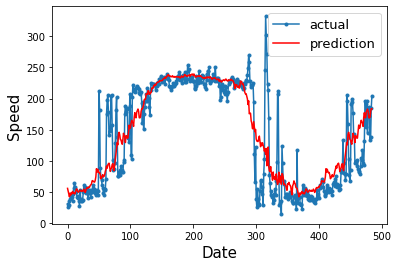

In [39]:
clf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
clf.fit(x_train, y_train)
confidence = clf.score(x_test, y_test)
print(confidence)

forecast_set = clf.predict(x_test)

aa=[x for x in range(485)]
plt.plot(aa, y_test[:485], marker='.', label="actual")
plt.plot(aa, forecast_set[:485], 'r', label="prediction")
plt.ylabel('Speed', size=15)
plt.xlabel('Date', size=15)
plt.legend(fontsize=13)
plt.show()

0.07243916265021422


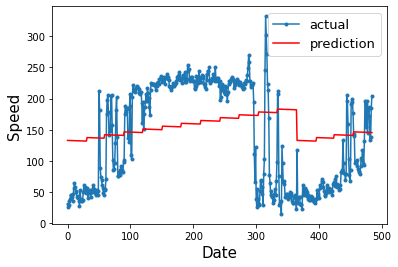

In [40]:
# clf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
clf = LinearRegression(n_jobs=-1)
clf.fit(x_train, y_train)
confidence = clf.score(x_test, y_test)
print(confidence)

forecast_set = clf.predict(x_test)

aa=[x for x in range(485)]
plt.plot(aa, y_test[:485], marker='.', label="actual")
plt.plot(aa, forecast_set[:485], 'r', label="prediction")
plt.ylabel('Speed', size=15)
plt.xlabel('Date', size=15)
plt.legend(fontsize=13)
plt.show()



In [41]:
# reshape input to be 3D [samples, timesteps, features]
x_train = x_train.reshape((x_train.shape[0], 1, x_train.shape[1]))
x_validation = x_validation.reshape((x_validation.shape[0], 1, x_validation.shape[1]))
x_test = x_test.reshape((x_test.shape[0], 1, x_test.shape[1]))
print(x_train.shape, y_train.shape, x_validation.shape, y_validation.shape, x_test.shape, y_test.shape)

(13149, 1, 2) (13149,) (731, 1, 2) (731,) (485, 1, 2) (485,)


Epoch 1/1
13149/13149 [==============================] - 3s 237us/step - loss: 126.6537

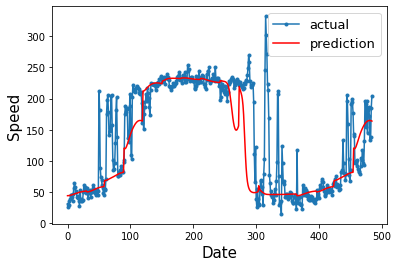

In [42]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(1, 2)))
model.add(Dropout(0.2))
model.add(LSTM(128))
model.add(Dropout(0.1))
model.add(Dense(1))
model.compile(loss='mean_absolute_error', optimizer='adam')
model.fit(x_train, y_train)

history = model.fit(x_train, y_train, epochs=20, batch_size=5, validation_data=(x_validation, y_validation), verbose=1, shuffle=False)

yhat = model.predict(x_test, verbose=0)
mean_absolute_error(y_test, yhat)
# print('Test RMSE: %.3f' % rmse)


aa=[x for x in range(485)]
plt.plot(aa, y_test[:485], marker='.', label="actual")
plt.plot(aa, yhat[:485], 'r', label="prediction")
plt.ylabel('Speed', size=15)
plt.xlabel('Date', size=15)
plt.legend(fontsize=13)
plt.show()




In [48]:
#direction prediction




df_trainValues = df_train.values
df_validationValues = df_validation.values
df_testValues = df_test.values

x_train, y_train = df_trainValues[:, 6:], df_trainValues[:, 2]
x_validation, y_validation = df_validationValues[:, 6:], df_validationValues[:, 2]
x_test, y_test = df_testValues[:, 6:], df_testValues[:, 2]

0.8083416377008348


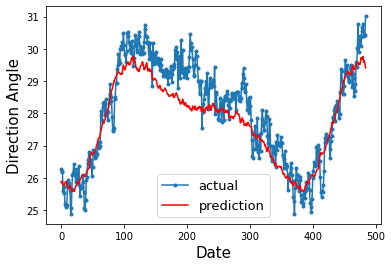

In [44]:
clf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
clf.fit(x_train, y_train)
confidence = clf.score(x_test, y_test)
print(confidence)

forecast_set = clf.predict(x_test)

aa=[x for x in range(485)]
plt.plot(aa, y_test[:485], marker='.', label="actual")
plt.plot(aa, forecast_set[:485], 'r', label="prediction")
plt.ylabel('Direction Angle', size=15)
plt.xlabel('Date', size=15)
plt.legend(fontsize=13)
plt.show()

-0.034839730783395195


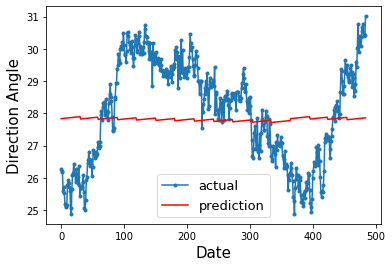

In [45]:
# clf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
clf = LinearRegression(n_jobs=-1)
clf.fit(x_train, y_train)
confidence = clf.score(x_test, y_test)
print(confidence)

forecast_set = clf.predict(x_test)

aa=[x for x in range(485)]
plt.plot(aa, y_test[:485], marker='.', label="actual")
plt.plot(aa, forecast_set[:485], 'r', label="prediction")
plt.ylabel('Direction Angle', size=15)
plt.xlabel('Date', size=15)
plt.legend(fontsize=13)
plt.show()

(13149, 1, 2) (13149,) (731, 1, 2) (731,) (485, 1, 2) (485,)
Epoch 1/1
13149/13149 [==============================] - 3s 205us/step - loss: 5.1422

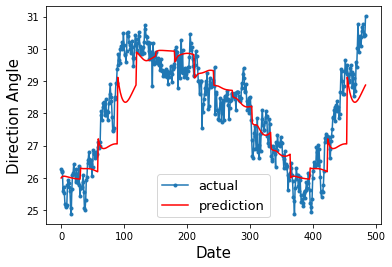

In [49]:
x_train = x_train.reshape((x_train.shape[0], 1, x_train.shape[1]))
x_validation = x_validation.reshape((x_validation.shape[0], 1, x_validation.shape[1]))
x_test = x_test.reshape((x_test.shape[0], 1, x_test.shape[1]))


print(x_train.shape, y_train.shape, x_validation.shape, y_validation.shape, x_test.shape, y_test.shape)


#for velosity 
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(1, 2)))
model.add(Dropout(0.2))
model.add(LSTM(128))
model.add(Dropout(0.1))
model.add(Dense(1))
model.compile(loss='mean_absolute_error', optimizer='adam')
model.fit(x_train, y_train)

history = model.fit(x_train, y_train, epochs=20, batch_size=5, validation_data=(x_validation, y_validation), verbose=1, shuffle=False)

yhat = model.predict(x_test, verbose=0)
mean_absolute_error(y_test, yhat)
# print('Test RMSE: %.3f' % rmse)


aa=[x for x in range(485)]
plt.plot(aa, y_test[:485], marker='.', label="actual")
plt.plot(aa, yhat[:485], 'r', label="prediction")
plt.ylabel('Direction Angle', size=15)
plt.xlabel('Date', size=15)
plt.legend(fontsize=13)
plt.show()